In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("6pij.pdb", "r") as infile:
    indata = infile.readlines()
    
    # Keep only atomic position data
    indata=[i for i in indata if i.startswith('ATOM')]
    
    # Generate 2 separate pandas DataFrames: 
    # ... chain A phosphorous positions
    pdata=[i.split()[6:9]for i in indata if i.split()[2]=='P' and i.split()[4]=='1']
    df = pd.DataFrame(pdata, columns=['x','y','z']).astype(float)
    del pdata
    
    
    del indata
    infile.close()

In [3]:
df.head()

,x,y,z
0,230.652,165.199,236.543
1,232.662,171.574,237.880
2,229.267,171.007,243.016
3,224.735,168.401,240.852
4,220.278,166.042,241.812


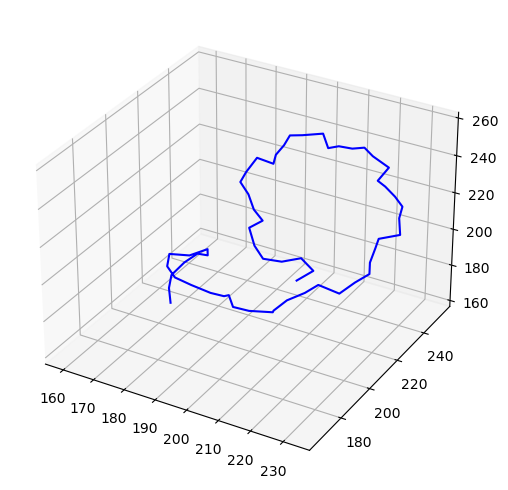

<Figure size 640x480 with 0 Axes>

In [4]:
fig = plt.figure(figsize=(5,5))

ax = plt.axes(projection='3d')

ax.plot(df.x, df.y, df.z, color='blue')

plt.tight_layout()
plt.show()
plt.clf()

In [5]:
import scipy.spatial.distance as spdist

In [6]:
dist = spdist.pdist(df, "euclidean")

dist

array([ 6.81676566,  8.80629423,  7.98944141, ...,  5.91760441,
       12.05244378,  6.27105119])

In [7]:
distances = spdist.squareform( dist )

distances

array([[  0.        ,   6.81676566,   8.80629423, ..., 101.65586675,
        103.7583133 , 104.6626271 ],
       [  6.81676566,   0.        ,   6.18271866, ..., 100.95094406,
        103.28368675, 104.40771294],
       [  8.80629423,   6.18271866,   0.        , ..., 102.48456304,
        105.0438864 , 106.44160415],
       ...,
       [101.65586675, 100.95094406, 102.48456304, ...,   0.        ,
          5.91760441,  12.05244378],
       [103.7583133 , 103.28368675, 105.0438864 , ...,   5.91760441,
          0.        ,   6.27105119],
       [104.6626271 , 104.40771294, 106.44160415, ...,  12.05244378,
          6.27105119,   0.        ]])

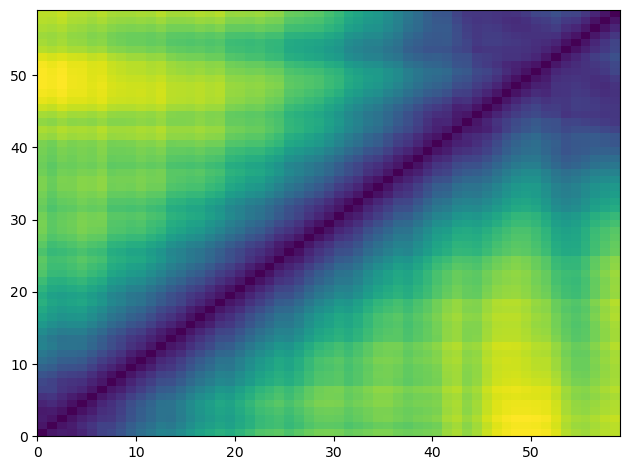

<Figure size 640x480 with 0 Axes>

In [8]:

fig = plt.figure()

plt.pcolormesh(distances)

plt.tight_layout()
plt.show()
plt.clf()


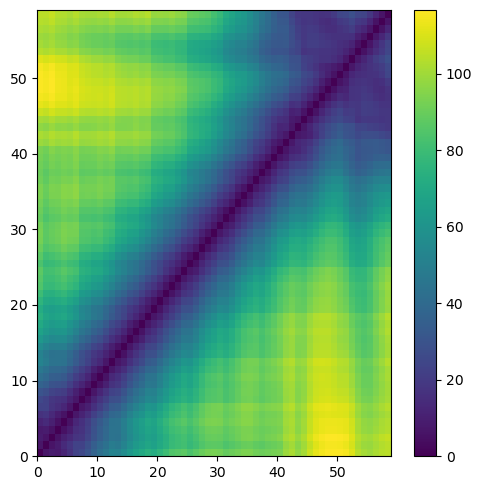

<Figure size 640x480 with 0 Axes>

In [9]:
fig = plt.figure( figsize=(5,5) )

plt.pcolormesh(distances)

# We need to add a colorbar() to give us some sense of what we plotted
plt.colorbar()

plt.tight_layout()
plt.show()
plt.clf()

# The colors appear to show a lighter color based on a larger value. 
# This would mean that the lighter the color the futher the (x,y) point are.

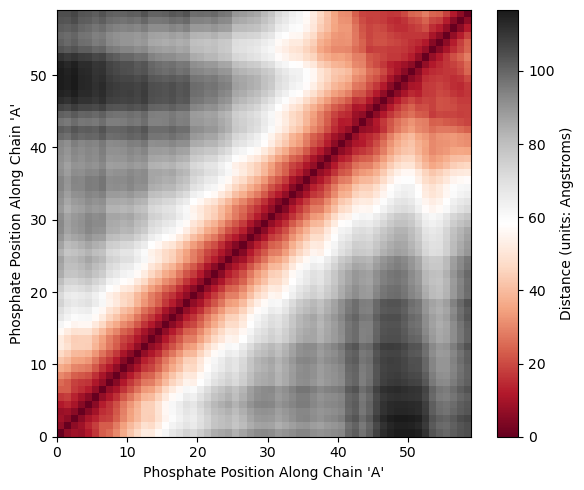

<Figure size 640x480 with 0 Axes>

In [17]:


fig = plt.figure( figsize=(6,5) )


plt.pcolormesh(distances, 
              cmap="RdGy")

plt.colorbar(label="Distance (units: Angstroms)")


plt.xlabel("Phosphate Position Along Chain 'A'")
plt.ylabel("Phosphate Position Along Chain 'A'")


plt.tight_layout()
plt.show()
plt.clf()
